![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 9 - Statistical Classification</center>
### <center> (Classification) Decision Trees</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/09_StatisticalClassification/MainTree1.ipynb)

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})

np.random.seed(1)

### Generate some data:

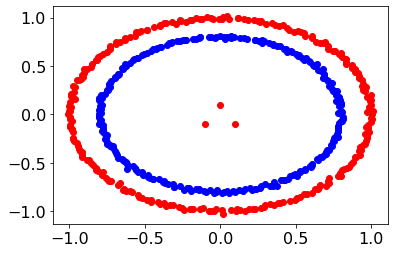

In [2]:
from sklearn import datasets

N           = 500
mX, vY      = datasets.make_circles(n_samples=N, noise=.01)
vY[vY == 0] = -1

mX[0,:] = [0,     0.1]
mX[1,:] = [-0.1, -0.1]
mX[2,:] = [0.1,  -0.1]
vY[:3]  = -1


vIdx0 = vY == -1
vIdx1 = vY == 1
plt.figure()
plt.scatter(mX[vIdx0,0], mX[vIdx0,1], color = 'r')
plt.scatter(mX[vIdx1,0], mX[vIdx1,1], color = 'b')
plt.show()

### Plot tree function:

In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

def PlotTree(K):
    TreeMdl        = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=K)
    TreeClassifier = TreeMdl.fit(mX, vY)
    
    v0       = np.linspace(mX[:,0].min(), mX[:,0].max(), 150)
    v1       = np.linspace(mX[:,1].min(), mX[:,1].max(), 150)
    XX0, XX1 = np.meshgrid(v0, v1)
    XX       = np.c_[XX0.ravel(), XX1.ravel()]

    _, ax = plt.subplots(1, 2, figsize=(20,10))
    Z = TreeClassifier.predict(XX)
    Z = Z.reshape(XX0.shape)

    ax[0].contourf(XX0, XX1, Z, colors=['red', 'blue'], alpha=0.3)
    ax[0].scatter(mX[vIdx0,0], mX[vIdx0,1], color='r')
    ax[0].scatter(mX[vIdx1,0], mX[vIdx1,1], color='b')

    plot_tree(TreeClassifier, filled=True, ax=ax[1], rounded=True)
    ax[1].set_title(f'Max splits = {K-1}')
    

In [4]:
from ipywidgets import interact, IntSlider, Layout

kSlider = IntSlider(min=2, max=20, step=1, value=2, layout=Layout(width='80%'))
interact(PlotTree, K=kSlider)
plt.show()

interactive(children=(IntSlider(value=2, description='K', layout=Layout(width='80%'), max=20, min=2), Output()…

### Generate some train and test data (from the same distribution):

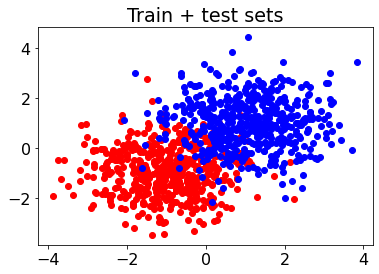

In [5]:
from sklearn.model_selection import train_test_split

N1  = 500
N2  = 500
mX1 = np.random.randn(N1, 2) + 1
mX2 = np.random.randn(N2, 2) - 1
vY1 = np.ones(N1)
vY2 = -np.ones(N2)
mX  = np.r_[mX1, mX2]
vY  = np.r_[vY1, vY2]

vIdx0 = vY == -1
vIdx1 = vY == 1
plt.figure()
plt.scatter(mX[vIdx0,0], mX[vIdx0,1], color = 'r')
plt.scatter(mX[vIdx1,0], mX[vIdx1,1], color = 'b')
plt.title('Train + test sets')
plt.show()

mTrainX, mTestX, vTrainY, vTestY = train_test_split(mX, vY, test_size=0.5)

### Train decision trees with various depths

In [6]:
lClassifiers = []
maxSplits    = 75
for kk in range(1, maxSplits+1):
    TreeMdl        = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=kk+1)
    TreeClassifier = TreeMdl.fit(mTrainX, vTrainY)
    lClassifiers.append(TreeClassifier)

### Plot function:

In [7]:
vTrainRes = np.array([cls.score(mTrainX, vTrainY) for cls in lClassifiers])
vTestRes  = np.array([cls.score(mTestX,  vTestY)  for cls in lClassifiers])

v0       = np.linspace(mX[:,0].min(), mX[:,0].max(), 150)
v1       = np.linspace(mX[:,1].min(), mX[:,1].max(), 150)
XX0, XX1 = np.meshgrid(v0, v1)
XX       = np.c_[XX0.ravel(), XX1.ravel()]

def PlotTree(K):
    _, ax = plt.subplots(1, 2, figsize=(20,10))
    Z = lClassifiers[K-1].predict(XX)
    Z = Z.reshape(XX0.shape)

    ax[0].contourf(XX0, XX1, Z, colors=['red', 'blue'], alpha=0.3)
    ax[0].scatter(mX[vIdx0,0], mX[vIdx0,1], color='r')
    ax[0].scatter(mX[vIdx1,0], mX[vIdx1,1], color='b')

    
    ax[1].plot(range(1, K+1), 1 - vTrainRes[:K], color='m', lw=2, marker='.', markersize=20, label='Train Error')
    ax[1].plot(range(1, K+1), 1 - vTestRes[:K],  color='k', lw=2, marker='.', markersize=20, label='Test Error')
    ax[1].legend()
    ax[1].set_title(f'Max splits = {K}')

#### Increasing the depth of a decision tree will cause to overfit

In [8]:
kSlider = IntSlider(min=1, max=maxSplits, step=1, value=1, layout=Layout(width='80%'))
interact(PlotTree, K=kSlider)
plt.show()

interactive(children=(IntSlider(value=1, description='K', layout=Layout(width='80%'), max=75, min=1), Output()…

### Exercise:
* Train a tree classifier on the `heart.csv` data.
* Get the best 20-fold cross validation accuracy.
* Try different sets of hyper-parameters:  
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [9]:
dData         = pd.read_csv('heart.csv')
dData.columns = ['Age', 'Sex', 'ChestPainType', 'RestingBloodPressure', 'Cholesterol', 'FastingBloodSugar', 'RestECG', 'MaxHeartRateAchieved',
                 'ExerciseInducedAngina', 'StDepression', 'StSlope', 'NumMajorVessels', 'Thalassemia', 'Target']
dData

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestECG,MaxHeartRateAchieved,ExerciseInducedAngina,StDepression,StSlope,NumMajorVessels,Thalassemia,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
dTrain = dData.drop(columns='Target')
dY     = dData['Target']

### Guassian SVM (without and pre-processing!)
* Reminder: with pre-processing we obtained about 85% accuracy.

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm             import SVC

dRes = pd.DataFrame(columns=['C', 'σ', 'Accuracy'])

for C in np.linspace(1, 100, 11):
    for σ in np.linspace(10, 20, 11):
        oSVM                = SVC(kernel='rbf', C=C, gamma=1/(2*σ**2))
        vAccuracy           = cross_val_score(oSVM, dTrain, dY, cv=KFold(20, shuffle=True))
        dRes.loc[len(dRes)] = [C, σ, vAccuracy.mean()]
        
dRes.sort_values(by='Accuracy', ascending=False)

### Train a tree classifier:

In [ ]:
???

### Train a Random-Forest (a collection of trees):

In [ ]:
from sklearn.ensemble import RandomForestClassifier

numberOfTrees = 100
oRandomForest = RandomForestClassifier(n_estimators=numberOfTrees, oob_score=True).fit(dTrain, dY)
#-- out of bag (oob) accuracy is similar to cross-validation accuracy:
oRandomForest.oob_score_

In [ ]:
import shap
shap.initjs()

oExplainer  = shap.TreeExplainer(oRandomForest, dTrain)
mShapValues = oExplainer.shap_values(dTrain, check_additivity=False)

In [ ]:
#-- Single data point:
idx = 10
display(dTrain.iloc[idx,:])
shap.force_plot(oExplainer.expected_value[1], mShapValues[1][idx,:], feature_names=dTrain.columns)

In [ ]:
#-- All data:
shap.summary_plot(mShapValues[1], dTrain)